## What is the most optimal skill to learn for Data Analysts?

Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. Determine if certain tecnologois are more prevalent


In [55]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

In [56]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
df_DA_US_explode = df_DA_US.explode('job_skills')

In [57]:
df_DA_skills = df_DA_US_explode.groupby(['job_skills'])['salary_year_avg'].agg(skill_count= 'count',median_salary= 'median').sort_values(by='skill_count' ,ascending=False)
df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
vmware,1,147500.0


In [58]:
DA_job_count = len(df_DA_US)
skill_percent_limit = 5

df_DA_skills['skill_percent'] = 100 * (df_DA_skills['skill_count'] / DA_job_count)
df_DA_skill_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent_limit]

df_DA_skill_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


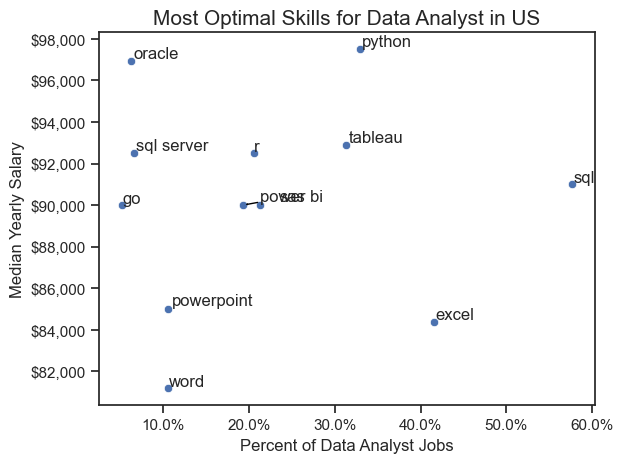

In [59]:
from adjustText import adjust_text

sns.scatterplot(data=df_DA_skill_demand, x='skill_percent', y='median_salary',)

texts = []
for i,skill in enumerate(df_DA_skill_demand.index):
    texts.append(
        plt.text(
            x= df_DA_skill_demand['skill_percent'].iloc[i]
            ,y= df_DA_skill_demand['median_salary'].iloc[i]
            ,s= skill
        )
    )

adjust_text(
    texts
    ,arrowprops=dict(arrowstyle='->',color='black')
    )

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in US' ,fontsize=15)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x}%'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,i: f'${y:,.0f}'))
plt.tight_layout()
plt.show()

In [60]:
df_tech = df['job_type_skills'].drop_duplicates().dropna().copy()

tech_dict= {}
for row in df_tech:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key,value in row_dict.items():
        if key in tech_dict:            # if key exist add value to existing value
            tech_dict[key] += value
        else:                           # if key not exist add key and value
            tech_dict[key] = value

for key, value in tech_dict.items():
    tech_dict[key] = list(set(value)) # to remove the duplicate values

df_tech = pd.DataFrame(list(tech_dict.items()),columns=['technology' , 'skills'])
df_tech_explode = df_tech.explode('skills')
df_tech_explode


,technology,skills
0,analyst_tools,power bi
0,analyst_tools,nuix
0,analyst_tools,sharepoint
0,analyst_tools,msaccess
0,analyst_tools,qlik
...,...,...
9,sync,google chat
9,sync,zoom
9,sync,microsoft teams
9,sync,webex


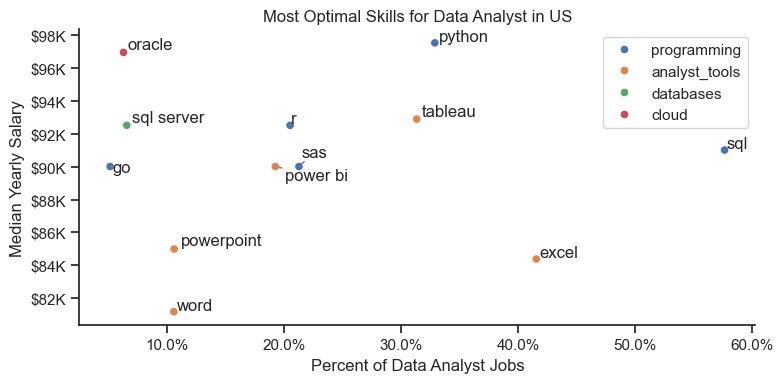

In [119]:
df_plot = df_DA_skill_demand.merge(df_tech_explode, how='left', left_on='job_skills', right_on='skills')

from adjustText import adjust_text

plt.figure(figsize=(8,4))

sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary',hue= 'technology')
sns.despine()
sns.set_theme(style='ticks')

texts = []
for i,skill in enumerate(df_DA_skill_demand.index):
    texts.append(
        plt.text(
            x= df_DA_skill_demand['skill_percent'].iloc[i]
            ,y= df_DA_skill_demand['median_salary'].iloc[i]
            ,s= skill
        )
    )

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst in US' ,fontsize=12)
plt.legend(title=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,i: f'{x}%'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,i: f'${y/1000:,.0f}K'))
plt.tight_layout()
plt.show()